In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

testing clt

In [3]:
df = 2
N = 100000
r = chi2.rvs(df, size=N)

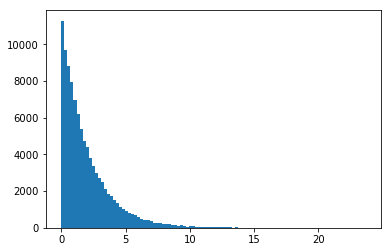

In [4]:
plt.hist(r,bins=100);

In [37]:
means = [np.mean(chi2.rvs(df,size=N)) for x in range(10000)]

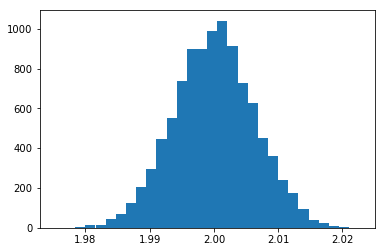

In [38]:
plt.hist(means,bins=30);

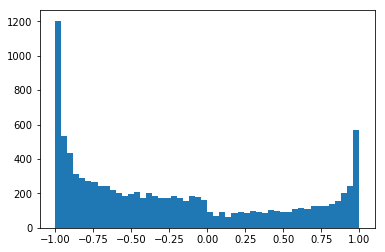

In [39]:
plt.hist(np.cos(np.random.random_sample(10000)*1.5*np.pi),bins=50);

In [40]:
means = [np.mean(np.cos(np.random.random_sample(10000)*1.5*np.pi)) for x in range(10000)]

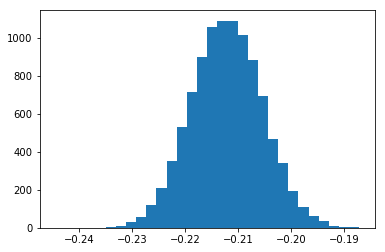

In [41]:
plt.hist(means,bins=30);

## In a city where residents prefer only boys, every family in the city continues to give birth to children until a boy is born. If a girl is born, they plan for another child. If a boy is born, they stop. Find out the proportion of boys to girls in the city.

In [44]:
import random

In [93]:
def run_boygirl_sim(N_parents = 10000):
    #true == boy, false == girl
    parents = range(N_parents)
    total_kids = []
    for parent in parents:
        while(True):
            isboy = bool(random.getrandbits(1))
            total_kids.append(isboy)
            if isboy: break
    nboys = np.sum(total_kids)
    ngirls = len(total_kids) - nboys
    
    return float(nboys) / ngirls

In [97]:
#run the simulation 1000 times, each with 10k parents
boygirl_proportions = [run_boygirl_sim() for x in range(1000)]

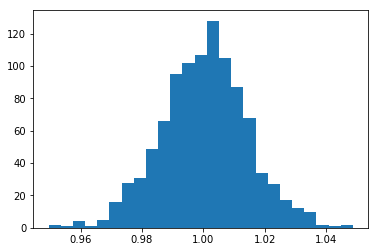

In [100]:
plt.hist(boygirl_proportions,bins=25);

[The math stack exchange agrees with the results; there are an equal number of boys and girls in the city.](https://math.stackexchange.com/questions/20426/famous-puzzle-girl-boy-proportion-problem-sum-of-infinite-series)

##### A coin of diameter 1-inches is thrown on a table covered with a grid of lines each two inches apart. What is the probability that the coin lands inside a square without touching any of the lines of the grid? You can assume that the person throwing has no skill in throwing the coin and is throwing it randomly. 

imagine only one grid square, with a smaller inner square, inset 0.5 inches from all sides. if center of coin falls within this inner square, it then isn't touching any of the lines of the grid. outer grid square goes from 0 to 2 on both x and y axis. inner grid square goes from 0.5 to 1.5 on both x and y axis. generate random number pairs (a,b) with a and b both from 0-2.

In [105]:
def is_in_inner_square(mypair):
    a, b = mypair
    return a > 0.5 and a < 1.5 and b > 0.5 and b < 1.5

In [126]:
def run_cointoss_sim(N_throws = 10000):
    xys = np.random.random_sample(size=(N_throws,2))*2.
    is_within_grid = [is_in_inner_square(xy) for xy in xys]
    return np.sum(is_within_grid)/float(N_throws)

In [127]:
#run the simulation 1000 times, each with 10k coin tosses
cointoss_proportions = [run_cointoss_sim() for x in range(1000)]

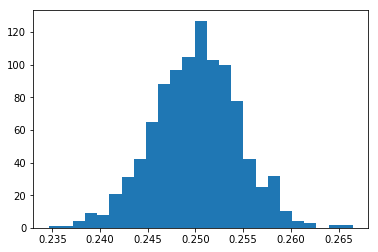

In [128]:
plt.hist(cointoss_proportions,bins=25);

[quora agrees, 25%](https://www.quora.com/A-1-inch-diameter-coin-is-thrown-on-a-table-covered-with-a-grid-of-lines-two-inches-apart-What-is-the-probability-the-coin-lands-in-a-square-without-touching-any-of-the-lines-of-the-grid)

#### average distance between two points in an abstract shape (applications to taxi drivers? or, fix one point and it is an application to find the optimal location for a fire station when the generated points are weighted based on historical crime data?)

[city of chicago boundary shapefile](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk)

In [142]:
import geopandas as gpd
import shapely
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import cascaded_union

In [143]:
my_poly = gpd.read_file('ChicagoCityBoundaryShapefile/geo_export_871bb634-5ec6-4aa3-a28b-c0f21fdc17e5.shp').geometry.values[0]
#convert multipolygon into polygon
eps = 0.01
my_poly = cascaded_union([
    Polygon(component.exterior).buffer(eps).buffer(-eps) for component in my_poly
])

In [135]:
import mplleaflet

In [154]:
plt.figure(figsize=(6,10))
plt.plot(*my_poly.exterior.xy,color='g',linewidth=10)
mplleaflet.display()

choose random points within the polygon by throwing darts at it. stole this code from stack overflow but it's exactly the same as i would have written myself [here](https://gis.stackexchange.com/questions/207731/how-to-generate-random-coordinates-in-a-multipolygon-in-python)

In [155]:
from shapely.geometry import Point

def generate_random(number, polygon):
    list_of_points = []
    minx, miny, maxx, maxy = polygon.bounds
    counter = 0
    while counter < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            list_of_points.append(pnt)
            counter += 1
    return list_of_points

In [159]:
#converting lat, long to approximate distance in kilometers
def latlong_pair_dist(latlong1, latlong2):
    """
    Utility function computing distance (in km) between two (latitude,longitude) pairs
    The equirectangular distance approximation is used because it is faster than the more
    legitimate Haversine formula, and is pretty much just as accurate for distances less than
    like 1000 km. All the distances I compute are within a given city so this should be fine.
    Lat/long should be in decimal degrees.
    Distance returned is in kilometers.
    """
    assert len(latlong1) == 2
    assert len(latlong2) == 2
    
    lat1, lon1, lat2, lon2 = latlong1[0], latlong1[1], latlong2[0], latlong2[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    Rearth = 6371. # earth radius, kilometers
    x = (lon2 - lon1) * np.cos( 0.5*(lat1 + lat2))
    y = lat2 - lat1
    return Rearth * np.sqrt( x*x + y*y )

In [177]:
#generate 1000 points which are within the polygon
polypoints = generate_random(1000,my_poly)

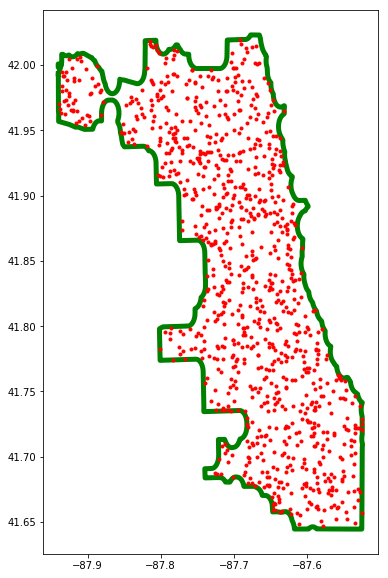

In [178]:
plt.figure(figsize=(6,10))
plt.plot(*my_poly.exterior.xy,color='g',linewidth=5)
for polypoint in polypoints:
    plt.plot(polypoint.x,polypoint.y,'r.')

In [173]:
#"x" is longitude, "y" is latitude for these shapely Point()'s.
latlong_pair_dist((testpoints[0].y,testpoints[0].x),(testpoints[1].y,testpoints[1].x))

4.002758631693803

In [171]:
testpoints[0].x, testpoints[0].y

(-87.59426976461512, 41.695461527689496)